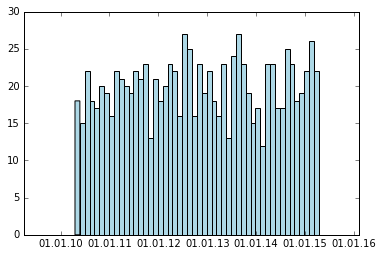

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# generate some random data (approximately over 5 years)
data = [float(random.randint(1271517521, 1429197513)) for _ in range(1000)]

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

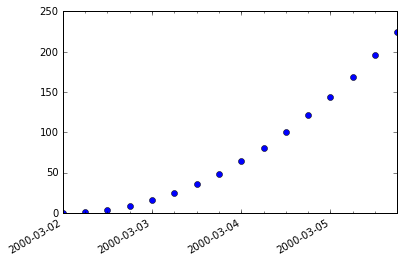

In [1]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
%matplotlib inline


date1 = datetime.datetime(2000, 3, 2)
date2 = datetime.datetime(2000, 3, 6)
delta = datetime.timedelta(hours=6)
dates = drange(date1, date2, delta)

y = arange(len(dates)*1.0)

fig, ax = plt.subplots()
ax.plot_date(dates, y*y)

# this is superfluous, since the autoscaler should get it right, but
# use date2num and num2date to convert between dates and floats if
# you want; both date2num and num2date convert an instance or sequence
ax.set_xlim(dates[0], dates[-1])

# The hour locator takes the hour or sequence of hours you want to
# tick, not the base multiple

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

plt.show()

datetime.datetime(2000, 3, 2, 0, 0)

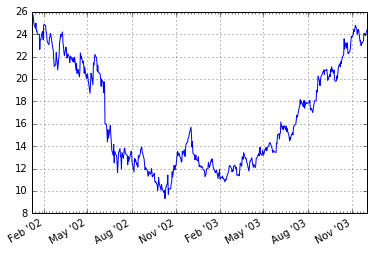

In [5]:
#!/usr/bin/env python

"""
Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks
"""
from __future__ import print_function
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
%matplotlib inline

date1 = datetime.date(2002, 1, 5)
date2 = datetime.date(2003, 12, 1)

# every monday
mondays = WeekdayLocator(MONDAY)

# every 3rd month
months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%b '%y")


quotes = quotes_historical_yahoo_ochl('INTC', date1, date2)
if len(quotes) == 0:
    print('Found no quotes')
    raise SystemExit

dates = [q[0] for q in quotes]
opens = [q[1] for q in quotes]

fig, ax = plt.subplots()
ax.plot_date(dates, opens, '-')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(mondays)
ax.autoscale_view()
#ax.xaxis.grid(False, 'major')
#ax.xaxis.grid(True, 'minor')
ax.grid(True)

fig.autofmt_xdate()

plt.show()

In [17]:
dates= [datetime.date(2015, m, 15) for m in range(1,13)]

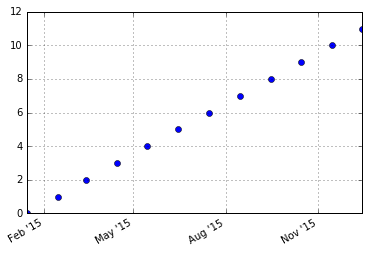

In [20]:
fig, ax = plt.subplots()
ax.plot_date(dates, range(len(dates)), 'o')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.autoscale_view()

ax.grid(True)

fig.autofmt_xdate()

plt.show()

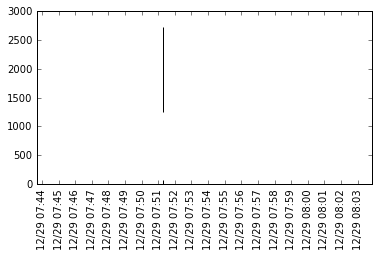

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates
import datetime

a = np.array([
    [1293605162197, 0, 0],
    [1293605477994, 63, 0],
    [1293605478057, 0, 0],
    [1293605478072, 2735, 1249],
    [1293606162213, 0, 0],
    [1293606162229, 0, 0]])

d = a[:,0]
y1 = a[:,1]
y2 = a[:,2]

# convert epoch to matplotlib float format
s = d/1000
ms = d-1000*s  # not needed?
dts = map(datetime.datetime.fromtimestamp, s)
fds = dates.date2num(dts) # converted

# matplotlib date format object
hfmt = dates.DateFormatter('%m/%d %H:%M')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.vlines(fds, y2, y1)

ax.xaxis.set_major_locator(dates.MinuteLocator())
ax.xaxis.set_major_formatter(hfmt)
ax.set_ylim(bottom = 0)
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=.3)
plt.show()

 

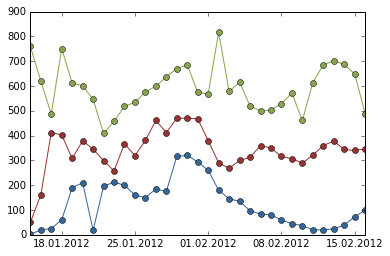

In [24]:
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.ticker as mticker
from matplotlib import dates
import datetime

fig = plot.figure(1)
DAU = (  2,  20,  25,  60, 190, 210,  18, 196, 212, 200, 160, 150, 185, 175, 316, 320, 294, 260, 180, 145, 135,  97,  84,  80,  60,  45,  37,  20,  20,  24,  39,  73,  99)
WAU = ( 50, 160, 412, 403, 308, 379, 345, 299, 258, 367, 319, 381, 461, 412, 470, 470, 468, 380, 290, 268, 300, 312, 360, 350, 316, 307, 289, 321, 360, 378, 344, 340, 346)
MAU = (760, 620, 487, 751, 612, 601, 546, 409, 457, 518, 534, 576, 599, 637, 670, 686, 574, 568, 816, 578, 615, 520, 499, 503, 529, 571, 461, 614, 685, 702, 687, 649, 489)

firstDay = datetime.datetime(2012,1,15)     #15. Januar 2012

dayArray = [firstDay + datetime.timedelta(days=i) for i in xrange(len(DAU))]

ax = plot.subplot(111)

line1 = ax.plot(dayArray, DAU, 'o-', color = '#336699')
line2 = ax.plot(dayArray, WAU, 'o-', color = '#993333')
line3 = ax.plot(dayArray, MAU, 'o-', color = '#89a54e')

ax.xaxis.set_major_formatter(dates.DateFormatter('%d.%m.%Y'))

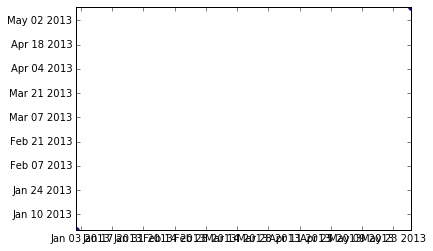

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DAILY
from datetime import datetime

ax = plt.subplot(111)
plt.plot_date([datetime(2013, 1, 1), datetime(2013, 5, 31)],
              [datetime(2013, 1, 1), datetime(2013, 5, 10)])

loc = ax.xaxis.get_major_locator()
loc.maxticks[DAILY] = 12

plt.show()

In [26]:
import datetime as dt

dates = ['01/02/1991','01/03/1991','01/04/1991']
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
y = range(len(x)) # many thanks to Kyss Tao for setting me straight here

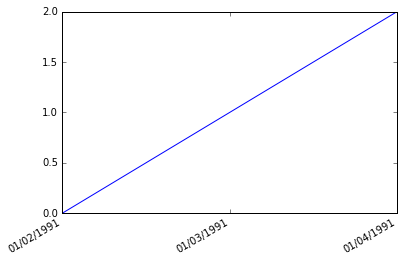

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.gcf().autofmt_xdate()